# Requirements

In [23]:
import pandas as pd
import missingno as msno
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer,SimpleImputer
from sklearn.preprocessing import MinMaxScaler

In [24]:
# Add as many imports as you need.

# Read the dataset

In [25]:
# Write your code here. Add as many boxes as you need.
data = pd.read_csv("marketing_campaign.csv")
df = data.copy()
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp1,AcceptedCmp2,Response
0,5524.0,1957.0,Graduation,Single,58138.0,NaN,NaN,4/9/2012,58.0,635.0,88.0,88.0,3.0,8.0,10.0,4.0,7.0,0.0,0.0,1.0
1,NaN,1954.0,NaN,Single,46344.0,1.0,1.0,8/3/2014,NaN,NaN,1.0,6.0,2.0,1.0,1.0,2.0,5.0,0.0,0.0,0.0
2,4141.0,1965.0,Graduation,NaN,71613.0,NaN,0.0,21-08-2013,26.0,NaN,49.0,42.0,NaN,8.0,2.0,10.0,4.0,0.0,0.0,0.0
3,6182.0,1984.0,Graduation,NaN,26646.0,1.0,0.0,10/2/2014,26.0,11.0,4.0,5.0,2.0,2.0,0.0,4.0,6.0,0.0,0.0,0.0
4,5324.0,NaN,PhD,Married,58293.0,1.0,0.0,19-01-2014,94.0,173.0,43.0,15.0,5.0,5.0,3.0,6.0,5.0,NaN,0.0,0.0


In [26]:
df.Education.unique()

array(['Graduation', nan, 'PhD', 'Master', 'Basic', '2n Cycle',
       'Master Student'], dtype=object)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   1932 non-null   float64
 1   Year_Birth           1925 non-null   float64
 2   Education            1921 non-null   object 
 3   Marital_Status       1924 non-null   object 
 4   Income               1855 non-null   float64
 5   Kidhome              1921 non-null   float64
 6   Teenhome             1950 non-null   float64
 7   Dt_Customer          1929 non-null   object 
 8   Recency              1930 non-null   float64
 9   MntWines             1907 non-null   float64
 10  MntFruits            1930 non-null   float64
 11  MntGoldProds         1921 non-null   float64
 12  NumDealsPurchases    1936 non-null   float64
 13  NumWebPurchases      1907 non-null   float64
 14  NumCatalogPurchases  1900 non-null   float64
 15  NumStorePurchases    1915 non-null   f

In [28]:
df.isnull().sum() / len(df) * 100

ID                     13.750000
Year_Birth             14.062500
Education              14.241071
Marital_Status         14.107143
Income                 17.187500
Kidhome                14.241071
Teenhome               12.946429
Dt_Customer            13.883929
Recency                13.839286
MntWines               14.866071
MntFruits              13.839286
MntGoldProds           14.241071
NumDealsPurchases      13.571429
NumWebPurchases        14.866071
NumCatalogPurchases    15.178571
NumStorePurchases      14.508929
NumWebVisitsMonth      13.973214
AcceptedCmp1           13.214286
AcceptedCmp2           14.196429
Response               15.178571
dtype: float64

In [34]:
le = LabelEncoder()
mask = df['Education'].isnull()
df['Education'] = le.fit_transform(df['Education'].astype(str).values.ravel())
df.loc[mask, 'Education'] = None

array([2., 6., 5., 3., 1., 0., 4.])

In [15]:
encoder = LabelEncoder()
df['Dt_Customer'] = encoder.fit_transform(df['Dt_Customer'])
df.loc[df['Dt_Customer'] == -1, 'Dt_Customer'] = np.nan
df['Dt_Customer'].round()

0       535.0
1       610.0
2       285.0
3        31.0
4       209.0
        ...  
2235     95.0
2236     39.0
2237    360.0
2238    643.0
2239    139.0
Name: Dt_Customer, Length: 2240, dtype: float64

In [18]:
encoder = LabelEncoder()
df['Marital_Status'] = encoder.fit_transform(df['Marital_Status'])
df.loc[df['Marital_Status'] == -1, 'Marital_Status'] = np.nan
df['Marital_Status'].round()

0       4.0
1       4.0
2       8.0
3       8.0
4       3.0
       ... 
2235    3.0
2236    5.0
2237    2.0
2238    8.0
2239    3.0
Name: Marital_Status, Length: 2240, dtype: float64

In [19]:
df.drop(columns=['ID'],axis=1,inplace=True)

KeyError: "['ID'] not found in axis"

Explore the dataset using visualizations of your choice.

<Axes: >

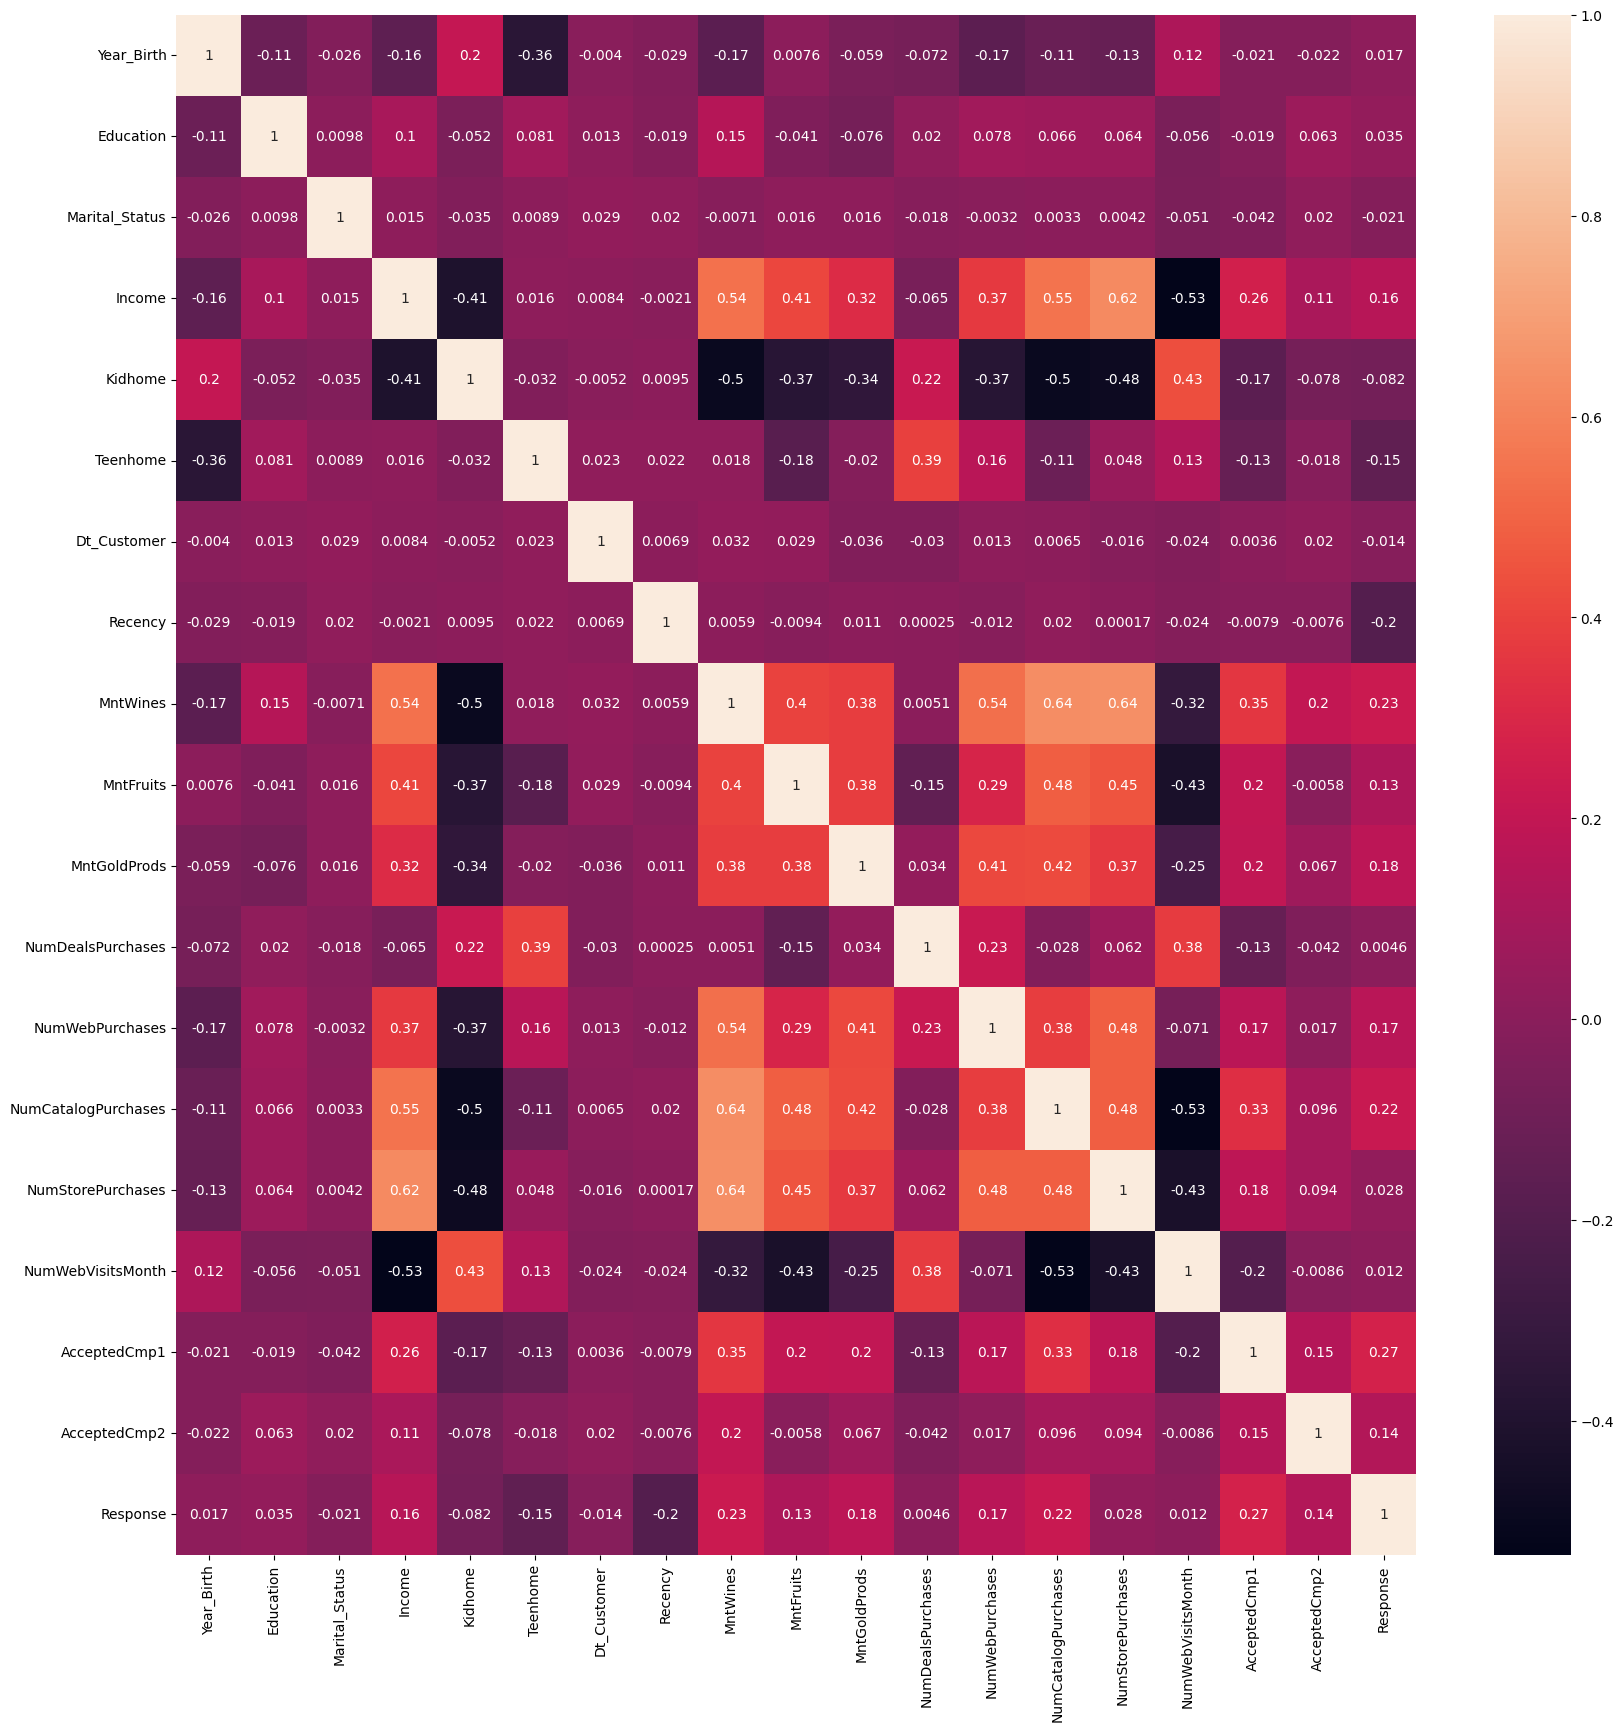

In [21]:
# Write your code here. Add as many boxes as you need.
plt.figure(figsize=(20, 20))
sns.heatmap(df.corr(),annot=True)

In [22]:
df.dropna(subset=["Response"],axis=0,inplace=True)

In [23]:
df.drop(columns=['Education', 'Marital_Status', 'Dt_Customer', 'Recency'],axis=1,inplace=True)

## Detecting Missing Values
Calculate the percentage of missing values present in each column of the dataset.

In [24]:
# Write your code here. Add as many boxes as you need.
df.isnull().sum() / len(df) * 100

Year_Birth             14.000000
Income                 17.578947
Kidhome                14.421053
Teenhome               13.105263
MntWines               15.210526
MntFruits              14.157895
MntGoldProds           14.157895
NumDealsPurchases      13.894737
NumWebPurchases        14.526316
NumCatalogPurchases    15.473684
NumStorePurchases      14.526316
NumWebVisitsMonth      14.210526
AcceptedCmp1           13.526316
AcceptedCmp2           14.000000
Response                0.000000
dtype: float64

## Understanding the Causes Behind Missing Values
Using visualization tools such as heatmaps, and dendrograms, illustrate the interdependence between attributes with missing values. Also, visualize the distribution of the missing values within the dataset using matrices and bar charts. To achieve this use the `missingno` library.

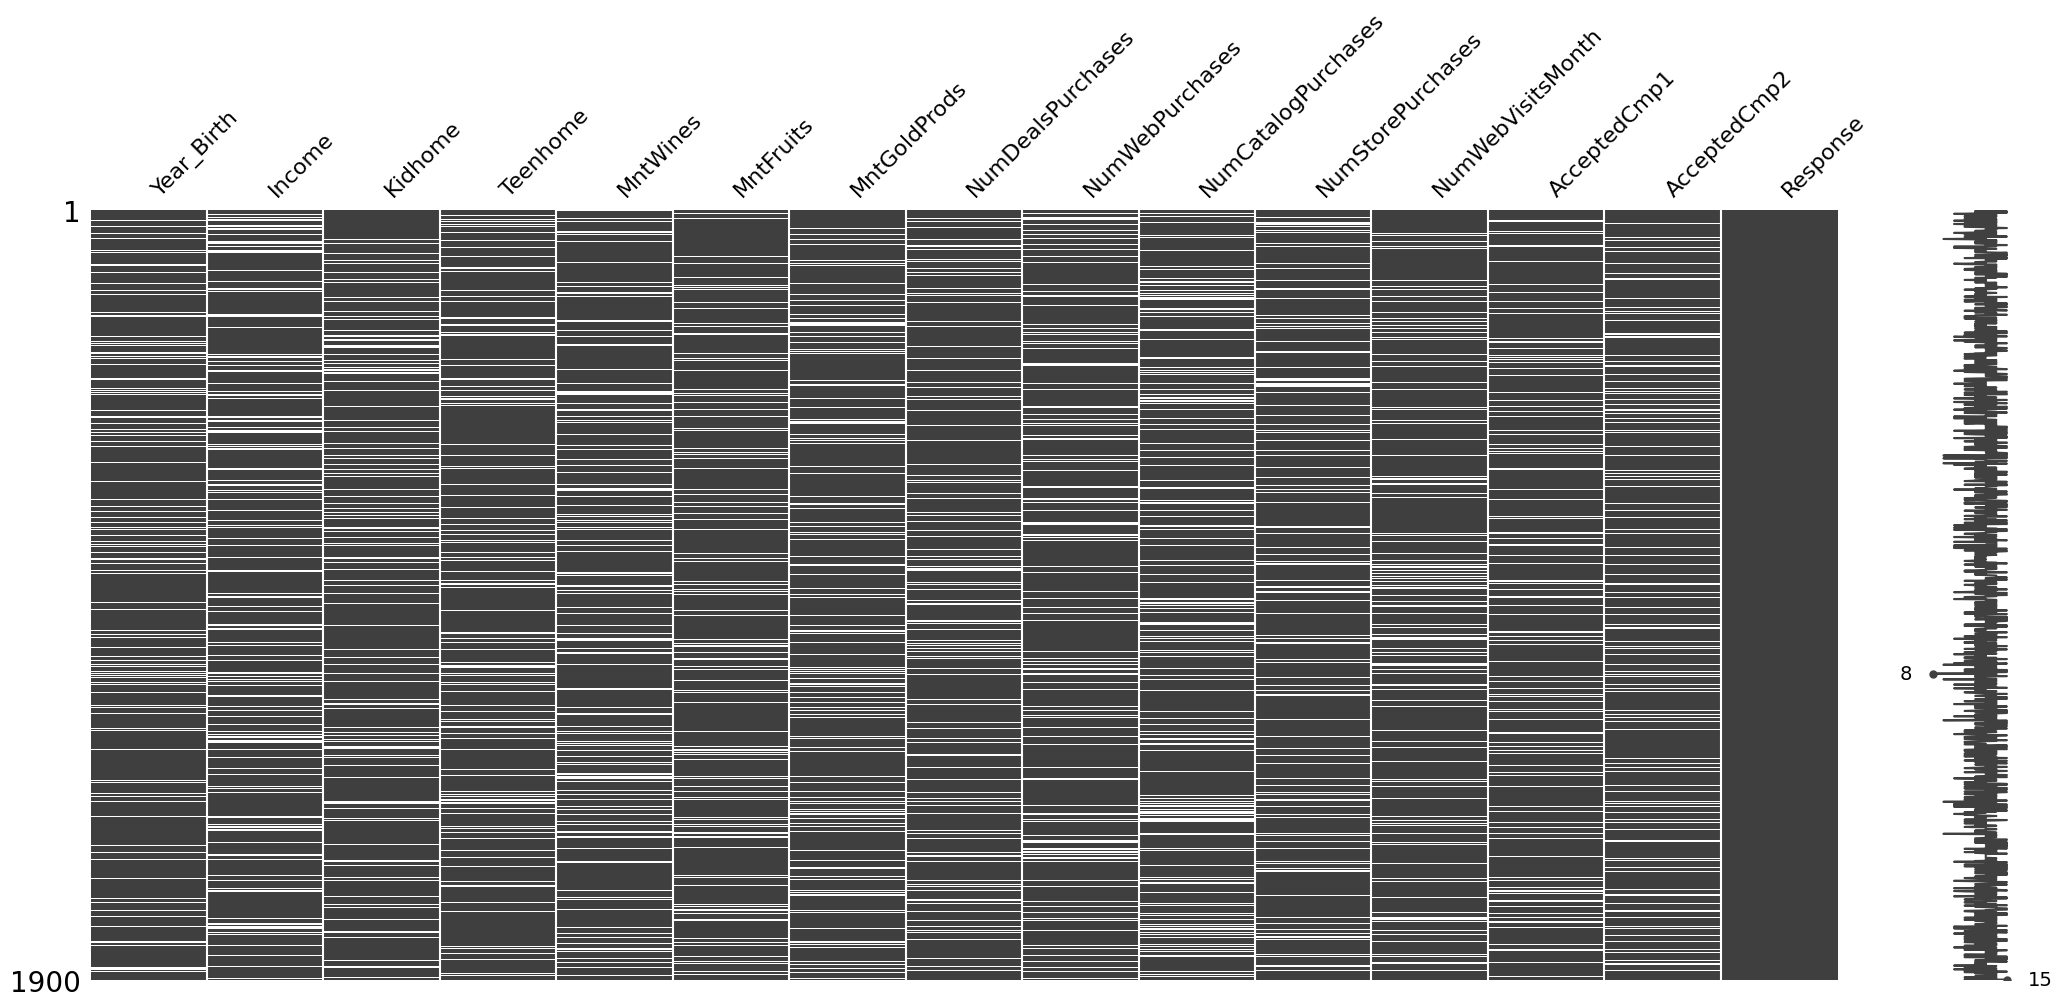

In [25]:
# Write your code here. Add as many boxes as you need.
msno.matrix(df)
plt.show()

## Handling the Missing Values
Handle the missing values using suitable method based on the insights obtained from the various visualizations.

In [26]:
# Write your code here. Add as many boxes as you need.
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')
df['Year_Birth'] = imputer.fit_transform(df['Year_Birth'].values.reshape(-1,1))

In [27]:
imputer = SimpleImputer(strategy='median')
df['Income'] = imputer.fit_transform(df['Income'].values.reshape(-1,1))

In [29]:
numerical_attributes = [
 'MntWines',
 'MntFruits',
 'MntGoldProds',
 'NumDealsPurchases',
 'NumWebPurchases',
 'NumCatalogPurchases',
 'NumStorePurchases',
 'NumWebVisitsMonth']
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df[numerical_attributes])
knn_imputer = KNNImputer(n_neighbors=5)
imputed_data = knn_imputer.fit_transform(scaled_data)
imputed_data = scaler.inverse_transform(imputed_data)
df[numerical_attributes] = imputed_data

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1900 entries, 0 to 2239
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year_Birth           1900 non-null   float64
 1   Income               1900 non-null   float64
 2   Kidhome              1626 non-null   float64
 3   Teenhome             1651 non-null   float64
 4   MntWines             1900 non-null   float64
 5   MntFruits            1900 non-null   float64
 6   MntGoldProds         1900 non-null   float64
 7   NumDealsPurchases    1900 non-null   float64
 8   NumWebPurchases      1900 non-null   float64
 9   NumCatalogPurchases  1900 non-null   float64
 10  NumStorePurchases    1900 non-null   float64
 11  NumWebVisitsMonth    1900 non-null   float64
 12  AcceptedCmp1         1643 non-null   float64
 13  AcceptedCmp2         1634 non-null   float64
 14  Response             1900 non-null   float64
dtypes: float64(15)
memory usage: 237.5 KB


In [31]:
frequent_imputer = SimpleImputer(strategy = 'most_frequent')
df["AcceptedCmp2"] = frequent_imputer.fit_transform(df["AcceptedCmp2"].values.reshape(-1,1))

In [34]:
lista = ['Kidhome',
 'Teenhome',
 'AcceptedCmp1']
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df[lista])
knn_imputer = KNNImputer(n_neighbors=5)
imputed_data = knn_imputer.fit_transform(scaled_data)
imputed_data = scaler.inverse_transform(imputed_data)

df[lista] = imputed_data

In [35]:
df.isnull().sum()

Year_Birth             0
Income                 0
Kidhome                0
Teenhome               0
MntWines               0
MntFruits              0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp1           0
AcceptedCmp2           0
Response               0
dtype: int64

## Feature Preprocessing


Preprocess the features to make them ready for using the model

In [36]:
# Write your code here. Add as many boxes as you need.
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
X = df.drop(columns=['Response'])
Y = df['Response']

In [37]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2)

In [38]:
from sklearn.model_selection import KFold, RepeatedKFold
#podatochnoto m-vo: (1,2,3,4,5) 4-train 1-test x5 vo plus 1 iteracii
rkf = RepeatedKFold(n_splits=5)

In [42]:
param_grid ={
    'criterion':["gini", "entropy", "log_loss"],
    'max_depth': [10,15,20,25],
    'min_samples_split': [4,8,12]
}

In [48]:
from sklearn.model_selection import GridSearchCV

cv = GridSearchCV(estimator=model,param_grid=param_grid,cv=rkf,n_jobs=-1,)

In [49]:
cv.fit(X_train, Y_train)

GridSearchCV(cv=RepeatedKFold(n_repeats=10, n_splits=5, random_state=None),
             estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [10, 15, 20, 25],
                         'min_samples_split': [4, 8, 12]})

In [50]:
best_model = cv.best_estimator_
Y_pred = best_model.predict(X_test)

In [51]:
from sklearn.metrics import accuracy_score, f1_score, classification_report

print(f1_score(Y_test,Y_pred))
print(accuracy_score(Y_test,Y_pred))
print(classification_report(Y_test,Y_pred))

0.42105263157894735
0.8552631578947368
              precision    recall  f1-score   support

         0.0       0.87      0.97      0.92       316
         1.0       0.65      0.31      0.42        64

    accuracy                           0.86       380
   macro avg       0.76      0.64      0.67       380
weighted avg       0.84      0.86      0.83       380

